In [8]:
# Pandas is our data manipulation library to obtain a clean data
import pandas as pd
# Seaborn is a visualization library which allows us to look at statistical visualizations
import seaborn as sns
# Matplotlib is another visualization library
import matplotlib.pyplot as plt
# Clustring library from sklearn
from sklearn.cluster import KMeans
# To run this press shift+enter

In [14]:
# Use variable called df (u can name the variable whatever u want)
df = pd.read_csv("C:/Users/nejat/OneDrive/Desktop/Mall_Customers.csv")
# To copy the file path press shift+right click, then select copy path. After that do not forget to make the slashes opposite (like this :/)
# If you press shift+tab you can see the documentation


In [15]:
# To see the data.
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [16]:
# I just wanted to look at a variable called Spending Score.
# This variable has been given to us by the shopping mall. So we do not really know what went into this variable's creation.
# I wanna look at that score and visualize it.

df. describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\nejat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

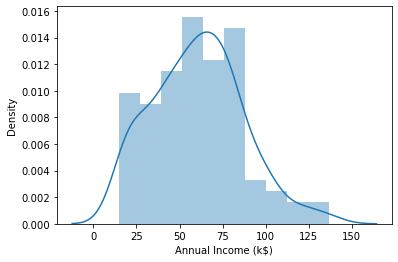

In [20]:
# Create an histogram and analyze annual income using seaborn library.
# Inside displot function, we just need to write df+ column name. Then press shift+enter.

sns.distplot(df['Annual Income (k$)'])
df.columns

C:\Users\nejat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nejat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


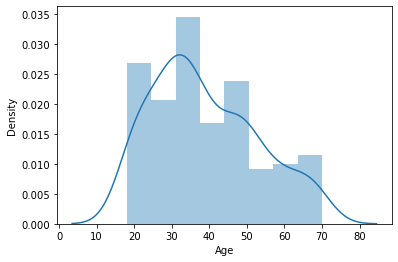

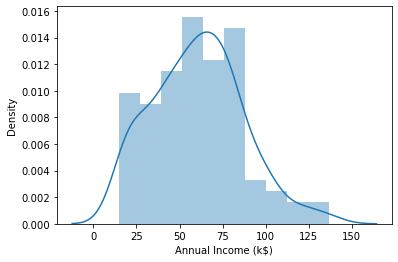

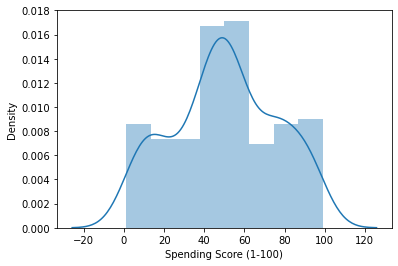

In [22]:
# Cycle through the list and create a new visual (like the histogram above) for each column
Columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in Columns:
    plt.figure()
    sns.distplot(df[i])

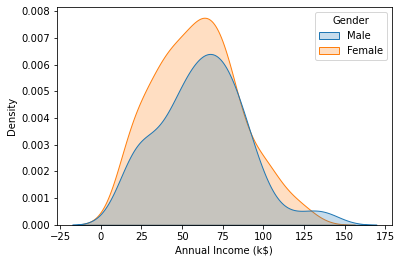

In [26]:
sns.kdeplot(df['Annual Income (k$)'], shade = True, hue = df['Gender']);

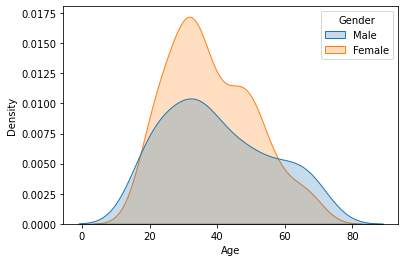

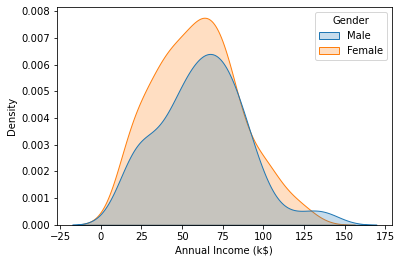

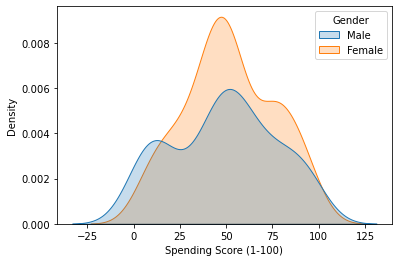

In [31]:
Columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in Columns:
    plt.figure()
    sns.kdeplot(df[i], shade =True, hue= df['Gender']);
    

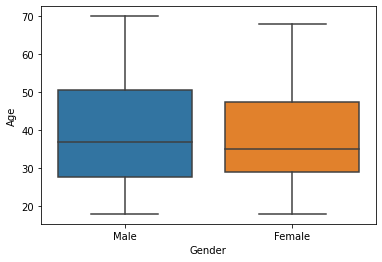

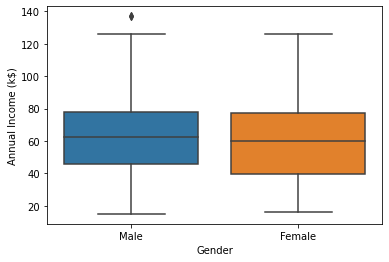

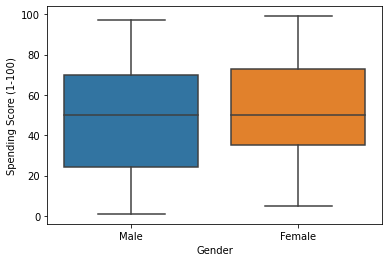

In [33]:
# Now, I would like to look into this using 'boxplot'.
# If we are to draw a boxplot, we need to define x-axis and y-axis.
# Inside the boxplot function, for x axis I wanna put gender
# For y-axis, I wanna see each one of those numerical variables that we have in our list.

Columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in Columns:
    plt.figure()
    sns.boxplot(data=df, x= 'Gender', y=df[i])
        
# For age, the median is a bit higher for the male than the female. Also, in male the data is more clustred between 28-50 while in female it is around 30-48.
# Even though we have similar medians, we have much more values in male spending scores than females.


In [36]:
# Percentage of genders in the data.
# This gives us some idea about how our data is shaped.
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

In [ ]:
# In bivariate analysis, we are looking at two variables. Usually, scatterplot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

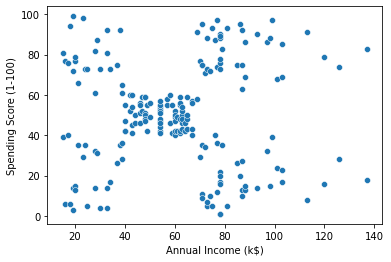

In [37]:
sns.scatterplot(data= df, x='Annual Income (k$)',y=
       'Spending Score (1-100)')

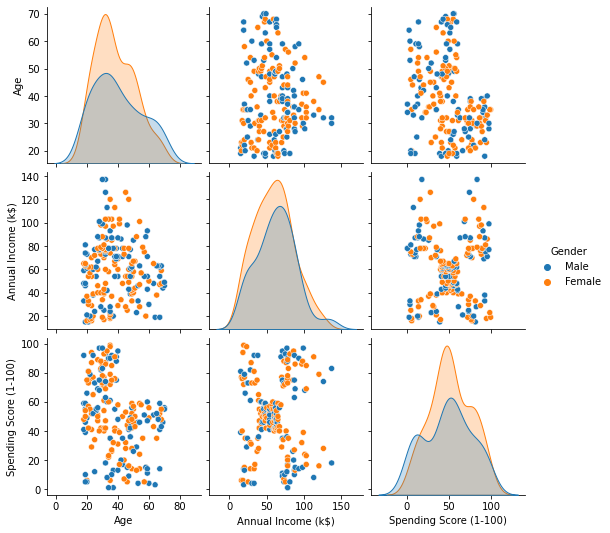

In [45]:
# Axis=1 is columns and Axis=0 is rows.
#df = df.drop('CustomerID',axis=1)
#No need to run the above line again. So we comment it out after having run it.
sns.pairplot(df, hue= 'Gender')

In [46]:
# I would wanna see the mean values of our data.
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

<ipython-input-46-43e8bd984252>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Gender'])['Age', 'Annual Income (k$)',


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [47]:
df.corr()
# We can see that age and annual income has a negative correlation as well as spending score.

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

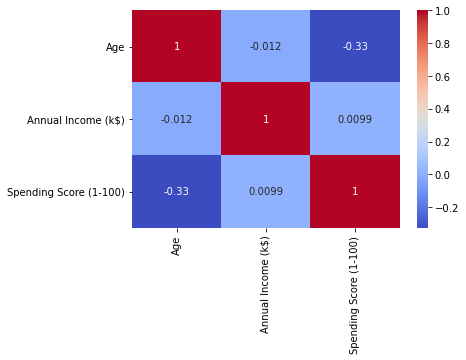

In [50]:
#Annotation = Notes,cmap=color mapping
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

# Clustring - Univariate, Bivariate, Multivariate

In [78]:
clustering1 = KMeans(n_clusters=3)

In [79]:
clustering1.fit(df[['Annual Income (k$)']])
# we need to encapsulate that in brackets.

KMeans(n_clusters=3)

In [80]:
# We are going to see all (eight) clustering variables.
# They dont mean much if we dont compare it with our inital dataset.
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [81]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [82]:
df['Income Cluster'].value_counts()
# We can see that the majority is in cluster 1

1    104
0     74
2     22
Name: Income Cluster, dtype: int64

In [83]:
#Since we do not know the ideal number of clusters, there is a method that show us the way.ELBOW METHOD.
#So, firstly, there is a success metric called 'intertia' which gives us a score. What inertia represents is 'the distance between the centroids'
#It should be relatively low number. Thats why we need to use ELBOW METHOD.
#So we need to use different number of clusters 1,2? or more?
clustering1.inertia_
# We want this number as low as possible.

24361.259213759215

In [84]:
#Right now as a default, we have 8 clusters in Kmeans.
#We need to create an efficient way to check inertia on each one of those clusters to see
# when we should start our number of clusters. We can do that by for loop
# We need to put inerti_scores as varaible, then we need to pass it as empty list.
# Then what im gonna do is to put all the scores that im going to get in this empty list.
inertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

C:\Users\nejat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [85]:
inertia_scores
# All the scores are here, but we need to pair these with our range. What we do next is to draw a plot.

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3972.3214285714325,
 2857.4416971916967,
 2180.781746031747,
 1736.5656510156507]

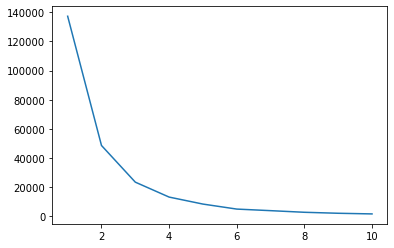

In [86]:
#Elbow method. Now we need to see where does the elbow starts.
#It looks like the 'elbow' starts at 3.

plt.plot(range(1,11),inertia_scores)

In [87]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [91]:
#Lets use 3 as the number of clusters that we want.
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

<ipython-input-91-fb01e9f91d31>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.663462,69.750000,49.798077
2,37.545455,108.181818,52.000000


In [ ]:
# Bivariate Clustering

In [101]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,0
1,Male,21,15,81,0,3
2,Female,20,16,6,0,0
3,Female,23,16,77,0,3
4,Female,31,17,40,0,0


C:\Users\nejat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


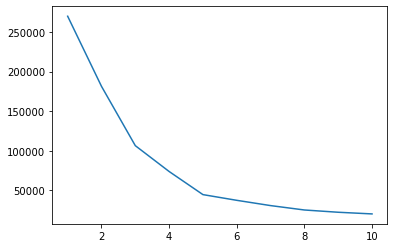

In [98]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [115]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns =['x','y']

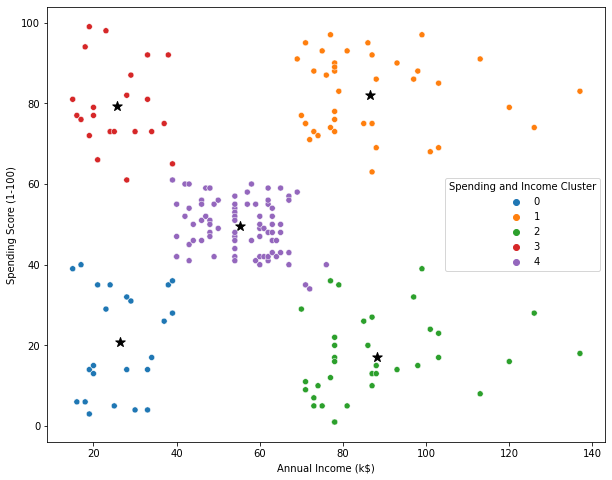

In [134]:
# We re gonna have cluster of 5
# Lets visualize this bivariate analysis
# To make the figure bigger use plt.figure(figsize =10,8)
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data =df, x='Annual Income (k$)', y='Spending Score (1-100)', hue ='Spending and Income Cluster', palette = 'tab10')
plt.savefig('clusering_bivariate.png')

In [118]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize = 'index')

#Now I can see that each one of those clusters. We can see the percentage of those clusters.
# Cluster 4 is our target cluster. Because, in that cluster, the customer spending score is high as well as annual income.
# That cluster will bring more money. 0.59 female to 0.41 male ratio.

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.592593,0.407407


In [119]:
#Lets get more information about the cluster by checking the customer age.
df.groupby('Spending and Income Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
Spending and Income Cluster,,,,
0,45.217391,26.304348,20.913043,0.000000
1,32.692308,86.538462,82.128205,1.282051
2,41.114286,88.200000,17.114286,1.314286
3,25.272727,25.727273,79.363636,0.000000
4,42.716049,55.296296,49.518519,0.641975


In [120]:
#Multivariate Clustering
from sklearn.preprocessing import StandardScaler


In [121]:
scale= StandardScaler()

In [122]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,0
1,Male,21,15,81,0,3
2,Female,20,16,6,0,0
3,Female,23,16,77,0,3
4,Female,31,17,40,0,0


In [125]:
dff = pd.get_dummies(df, drop_first = True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,0,1
1,21,15,81,0,3,1
2,20,16,6,0,0,0
3,23,16,77,0,3,0
4,31,17,40,0,0,0


In [124]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [127]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [128]:
dff = scale.fit_transform(dff)

In [130]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


C:\Users\nejat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


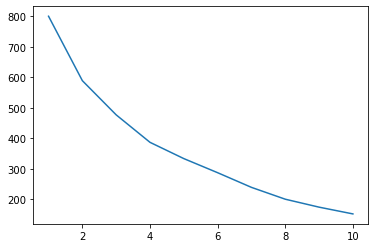

In [131]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [132]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,0
1,Male,21,15,81,0,3
2,Female,20,16,6,0,0
3,Female,23,16,77,0,3
4,Female,31,17,40,0,0
...,...,...,...,...,...,...
195,Female,35,120,79,2,1
196,Female,45,126,28,2,2
197,Male,32,126,74,2,1
198,Male,32,137,18,2,2


In [133]:
df.to_csv('Clustering.csv')

# Results

In [ ]:
Target Cluster

# Target Group would be cluster 1 which has a high Spending Score and high income.
# 54 percent of cluster 1 shoppers are women. We should look for ways to attract these customers using a marketing campaign targeting popular items in this cluster.
# Cluster 2 presents an interesting opportunity to market to the customers for sales event on popular items.